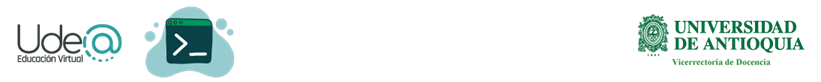

# <h1><center>Principal Component Analysis: Introduction and Applications</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2025-1**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

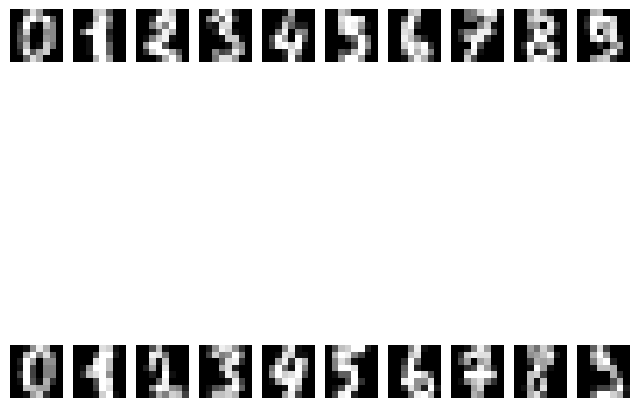

In [ ]:
# MNIST es una base de datos de imágenes con dígitos manuscritos del 0-9 con resolucion 8*8
dB = load_digits()
X = dB.data
y = dB.target
imgsdB = dB.images

fig, ax = plt.subplots(nrows = 2,ncols = 10,figsize=(8,8))

count = 0
for i in range(2):
  for j in range(10):
    ax[i,j].imshow(imgsdB[count,:,:],cmap = 'gray')
    ax[i,j].axis('off')
    count +=1
plt.show()

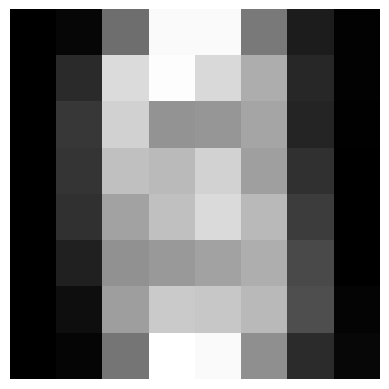

In [ ]:
# 1. Calcular la media del conjunto de entrenamiento
muDigit = X.mean(axis = 0)
plt.imshow(np.reshape(muDigit,(8,8)),cmap = 'gray')
plt.axis('off')
plt.show()

2. Calculamos la matriz de covarianza

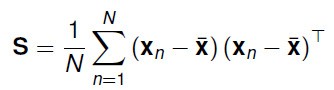

Podemos tener una representación multivariada

- ${\bf{X}}$ dataset con dimensión $N\times D$
- Una observación ${\bf{x}}_n$ es un vector de $D\times 1$
- con un vector media de ${\bf{\mu}}$ de $D\times 1$

$$
\mathbf{S}=\frac{1}{N} \left(\mathbf{X}-\overline{\mathbf{M}}\right)^{\top}\left(\mathbf{X}-\overline{\mathbf{M}}\right)
$$

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.82253951  2.39965886 ... -0.15980632  0.09845941
  -0.0740206 ]
 [ 0.          2.39965886 22.59579234 ... -1.15479735  1.41124994
   0.72947431]
 ...
 [ 0.         -0.15980632 -1.15479735 ... 34.79797313 15.63983626
   2.87398245]
 [ 0.          0.09845941  1.41124994 ... 15.63983626 16.72327062
   4.71815884]
 [ 0.         -0.0740206   0.72947431 ...  2.87398245  4.71815884
   3.45812736]]


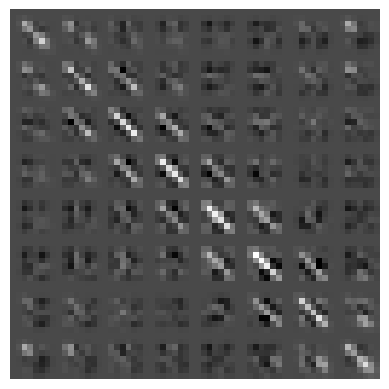

In [ ]:
MU = np.tile(muDigit,(len(y),1))
aux = X - MU
S =(1./len(y))*(aux.T @ aux)
print(S)

plt.imshow(S,cmap = 'gray')
plt.axis('off')
plt.show()

3. Tarea: Calcular los valores propios y vectores propios de la anterior matriz S utilizando numpy

In [ ]:
eigVals, eigVecs = np.linalg.eig(S)

<StemContainer object of 3 artists>

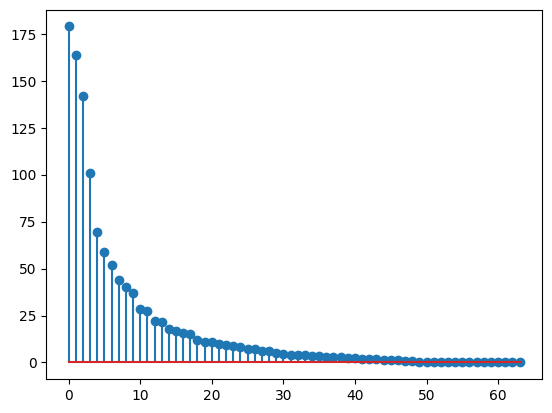

In [ ]:
plt.stem(eigVals)

Supongamos que nos vamos a quedar con las dos dimensiones latentes mas relevantes para visualizarlas

En PCA lo que realizamos es una transformación de la forma

${\bf{x}} = {\bf{W}}{\bf{z}}$

Se encuentra una transformación del espacio latente ${\bf{z}}$ que tiene dimensión $q\times 1$, donde $q\leq D$,

- ${\bf{W}}$ son los $q$ autovectores mas relevantes de la matriz de covarianza, de dim $D\times q$

In [ ]:
W = eigVecs[:,:2] # matriz de trasnformación PCA

En PCA queremos transofmras nuestros ${\bf{x}}_n$ al espacio latente ${\bf{z}}$

$({\bf{W}}^{\top}{\bf{W}})^{-1}{\bf{W}}^{\top}{\bf{x}} = ({\bf{W}}^{\top}{\bf{W}})^{-1}{\bf{W}}^{\top}{\bf{W}}{\bf{z}}$


${\bf{z}} = ({\bf{W}}^{\top}{\bf{W}})^{-1}{\bf{W}}^{\top}{\bf{x}}$

Donde $({\bf{W}}^{\top}{\bf{W}})^{-1}$ es la pseudo inversa de $\bf{}$

In [ ]:
zPCA = X@W@np.linalg.inv(W.T@W)

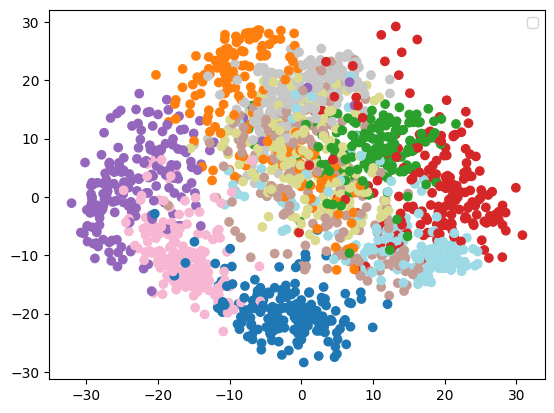

In [ ]:
plt.scatter(zPCA[:,0],zPCA[:,1],c=y,cmap ='tab20')
plt.legend()
plt.show()